<a href="https://colab.research.google.com/github/Mstfayldz/Data-Science/blob/master/FeatureEnginnering_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [502]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [503]:
df= pd.read_csv('googleplaystore.csv')

In [504]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [505]:
df.shape

(10841, 13)

In [506]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [507]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [508]:
df.describe()#sadece rating numeric

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [509]:
#missing data
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


# REVIEWS TRANSFORM THE NUMERIC

In [510]:
df["Reviews"].unique() # string olarak kaydedilmiş

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [511]:
df[["Reviews"]].count()

,0
Reviews,10841


In [512]:
#df["Reviews"]=df["Reviews"].astype(int) ===>>  invalid literal for int() with base 10: '3.0M' şeklinde hata verdi yani
                                              # data tam olarak numeric uygun değil

In [513]:
df["Reviews"].str.isnumeric().sum() # sadece 1 değer uygun değil yani çünkü toplamda 10841 datası vardı

np.int64(10840)

In [514]:
df[df["Reviews"].str.isnumeric()] #numeric olabilecek satırları gösterir

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [515]:
df[~df["Reviews"].str.isnumeric()] # "~" başında bunu kullanırsak tam tersini verir

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [516]:
df_clean=df.copy()

In [517]:
df_clean.drop(index=10472,inplace=True) #df_clean içinde artık Reviews için numeric olamayacak bir değer yok

In [518]:
df_clean.shape

(10840, 13)

In [519]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [520]:
df_clean["Reviews"]=df_clean["Reviews"].astype(int)

In [521]:
df_clean.describe() #artık Reviews da numeric

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


# SIZE TRANSFORM THE NUMERIC

In [522]:
df_clean["Size"].value_counts()

,count
Size,
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
...,...
253k,1
992k,1
658k,1


In [523]:
df_clean["Size"].unique() # k->kilobayt  M->Megabayt k leri kldırıp m lerin yerine de 000 koyarsak veri kilobayt cinsinden integer yazılmış olur

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [524]:
df_clean["Size"]=df_clean["Size"].str.replace("M","000")
df_clean["Size"]=df_clean["Size"].str.replace("k","")

In [525]:
df_clean["Size"].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [526]:
df_clean["Size"]

,Size
0,19000
1,14000
2,8.7000
3,25000
4,2.8000
...,...
10836,53000
10837,3.6000
10838,9.5000
10839,Varies with device


In [527]:
df_clean["Size"]=df_clean["Size"].str.replace("Varies with device",str(np.nan))

In [528]:
df_clean["Size"].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'nan', '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000'

In [529]:
df_clean["Size"]=df_clean["Size"].astype(float)

In [530]:
df_clean["Size"]

,Size
0,19000.0
1,14000.0
2,8.7
3,25000.0
4,2.8
...,...
10836,53000.0
10837,3.6
10838,9.5
10839,NaN


In [531]:
df_clean.describe()# Size da numeric olmuş oldu

,Rating,Reviews,Size
count,9366.000000,1.084000e+04,9145.000000
mean,4.191757,4.441529e+05,19579.419913
std,0.515219,2.927761e+06,24042.062020
min,1.000000,0.000000e+00,1.000000
25%,4.000000,3.800000e+01,5.600000
50%,4.300000,2.094000e+03,13000.000000
75%,4.500000,5.477550e+04,30000.000000
max,5.000000,7.815831e+07,100000.000000


In [532]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [533]:
df_clean.isnull().sum()# sizeda 1695 Varies with devices vardı şu an onlar nan oldu

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,1695
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


# Price & Installs / CLEANING THE CHARACTERS

In [534]:
df_clean["Installs"].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [535]:
df_clean["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [536]:
df_clean["Price"].value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
...,...
$3.61,1
$394.99,1
$1.26,1


In [537]:

df_clean["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [538]:
chars_to_remove=["+",",","$"]
cols_to_clean=["Installs","Price"]

In [539]:
for chars in chars_to_remove:
  for col in cols_to_clean:
    df_clean[col]=df_clean[col].str.replace(chars,"")

In [540]:
df_clean["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [541]:
df_clean["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [542]:
df_clean["Installs"]=df_clean["Installs"].astype(int)

In [543]:
df_clean["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [544]:
df_clean["Price"]=df_clean["Price"].astype(float)

In [545]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


# LAST UPDATED // TRANSFORM THE DATES

In [546]:
df_clean["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [547]:
df_clean["Last Updated"]=pd.to_datetime(df_clean["Last Updated"]) # bazen yazılan tarihi algılamaz eğer böyle bir şey olursa elimizdeki tarih stringini
                                                                  #tanımlatabiliriz parametre olarak fonksiyonun üzerine gelip dökümantasyonuna bakarak

In [548]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


datetime ı gün ay yıl olarak ayrı columnlara ekleyebiliriz

In [549]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [550]:
df_clean['Day']=df_clean["Last Updated"].dt.day          # datetime64[ns] a çevirdiğimiz için kullanabiliyoruz
df_clean['Month']=df_clean["Last Updated"].dt.month
df_clean['Year']=df_clean["Last Updated"].dt.year

In [551]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [552]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [553]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated,Day,Month,Year
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256,15.609041,6.422325,2017.399723
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,2017-09-20 00:00:00,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,2018-05-24 00:00:00,16.000000,7.000000,2018.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,2018-07-20 00:00:00,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018-08-08 00:00:00,31.000000,12.000000,2018.000000
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703,NaN,9.561621,2.578388,1.100914


# EDA

In [554]:
df_clean["App"].duplicated().sum() #1181 app ismi kendini tekrrlamış

np.int64(1181)

In [555]:
df_clean.drop_duplicates(subset="App",keep="first",inplace=True)

In [556]:
df_clean['App'].value_counts().sum()

np.int64(9659)

In [557]:
numerical_features=[feature for feature in df_clean.columns if df_clean[feature].dtype!="O"] # O object olmaktan gelir
categorical_features=[feature for feature in df_clean.columns if df_clean[feature].dtype=="O"]

In [558]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'Day',
 'Month',
 'Year']

In [559]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

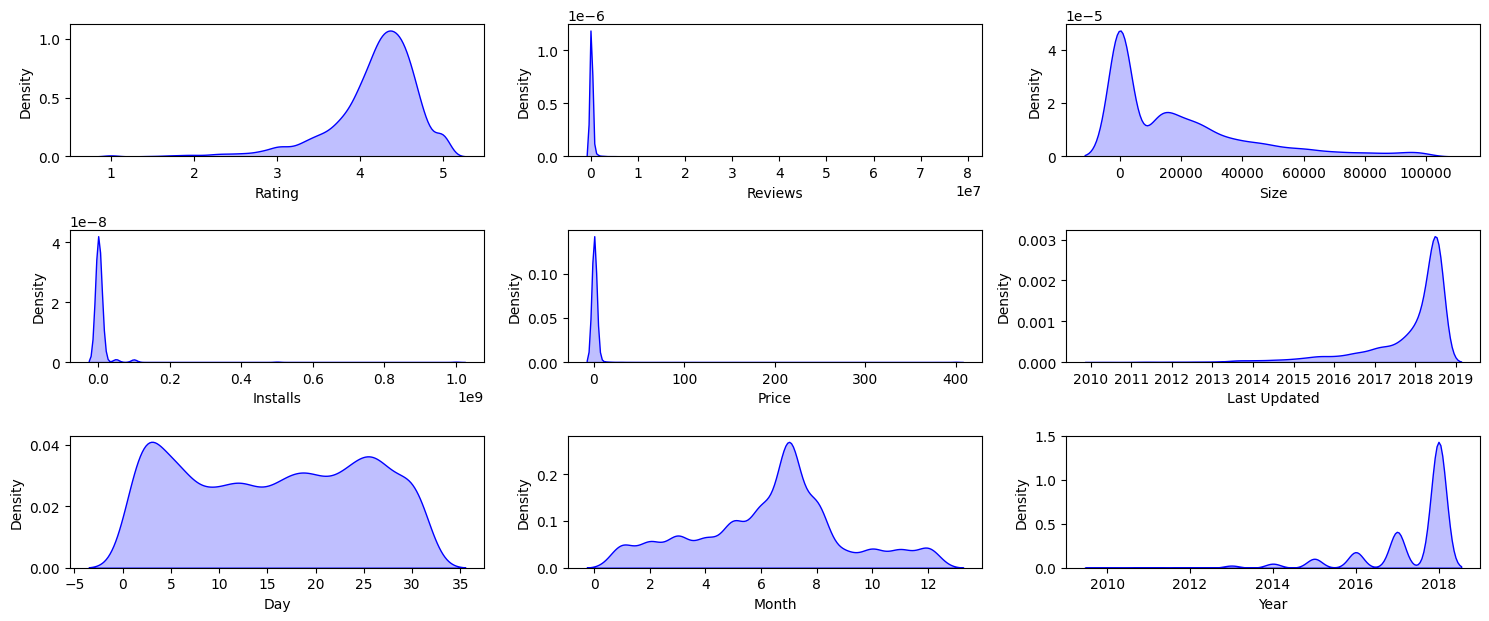

In [560]:
plt.figure(figsize=(15,10))
for i in range(0, len(numerical_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x=df_clean[numerical_features[i]], color="b",fill=True)
  plt.xlabel(numerical_features[i])
  plt.tight_layout()
plt.show()

Categorize olanların tabloları

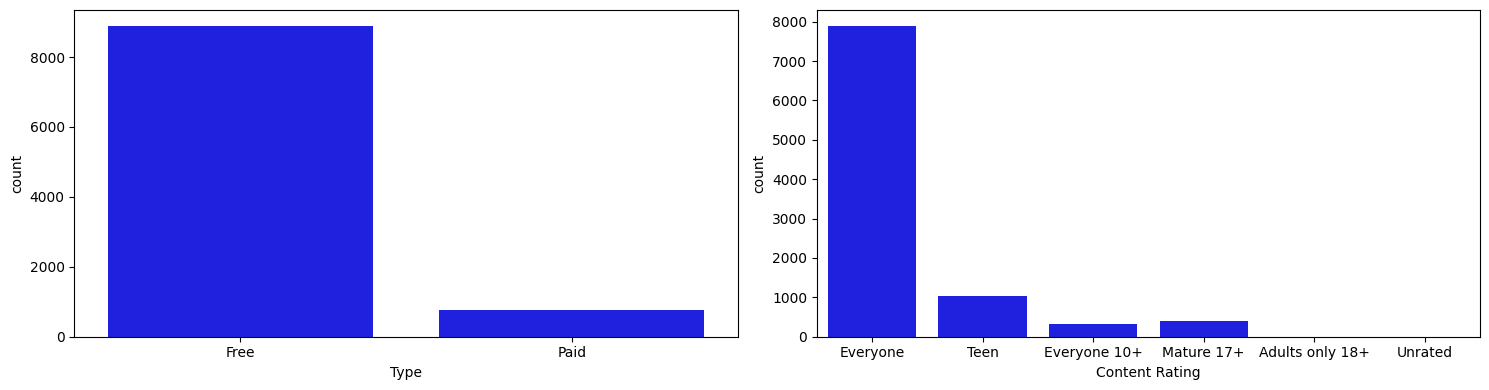

In [561]:
plt.figure(figsize=(15,4))
category=["Type","Content Rating"] # hepsini yapsak çok karışabilir
for i in range(0, len(category)):
  plt.subplot(1,2,i+1)
  sns.countplot(x=df_clean[category[i]], color="b",fill=True)
  plt.xlabel(category[i])
  plt.tight_layout()
plt.show()

In [562]:
df_clean["Category"].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [563]:
df_installs=df_clean.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index() #false büykten küçüpe olması için
                                                                                                         #indexi resetlemek önemli

In [564]:
df_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [565]:
df_installs["Installs"]=df_installs["Installs"]/1000000000

In [566]:
df_installs['Installs'].sort_values(ascending=False) # çok daha okunabilir saılar

,Installs
0,13.878924
1,11.038276
2,8.001772
3,5.793091
4,5.487868
5,4.649148
6,4.427942
7,3.926903
8,2.894887
9,2.369218


In [567]:
# show the top 10

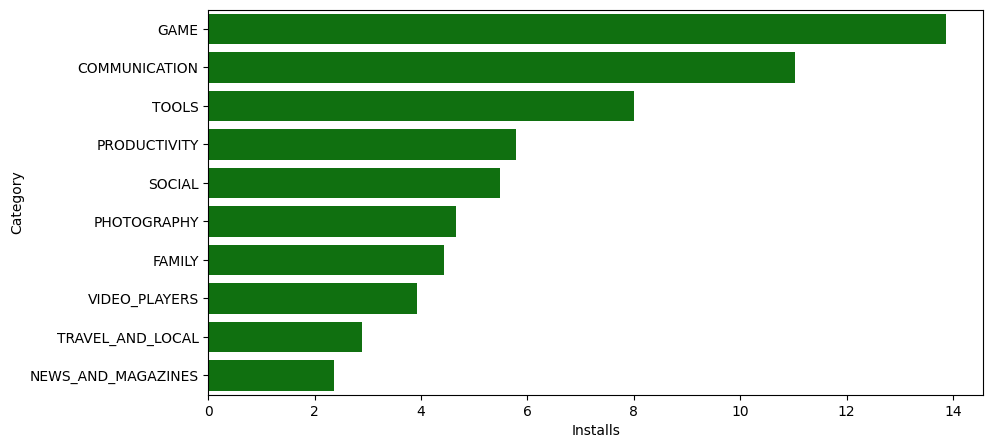

In [568]:
df2=df_installs.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Installs',y='Category',data=df2, color="g")
plt.show()

Top 5 apps for categories

In [569]:
df_apps_category=df_clean.groupby(['Category','App'])["Installs"].sum().reset_index()

In [570]:
df_apps_category.sort_values(by="Installs",ascending=False,inplace=True)

In [571]:
df_apps_category

,Category,App,Installs
9342,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1534,ENTERTAINMENT,Google Play Games,1000000000
9496,VIDEO_PLAYERS,Google Play Movies & TV,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
547,BUSINESS,CX Network,0
3661,FINANCE,Eu Sou Rico,0
2211,FAMILY,Command & Conquer: Rivals,0
3662,FINANCE,Eu sou Rico,0


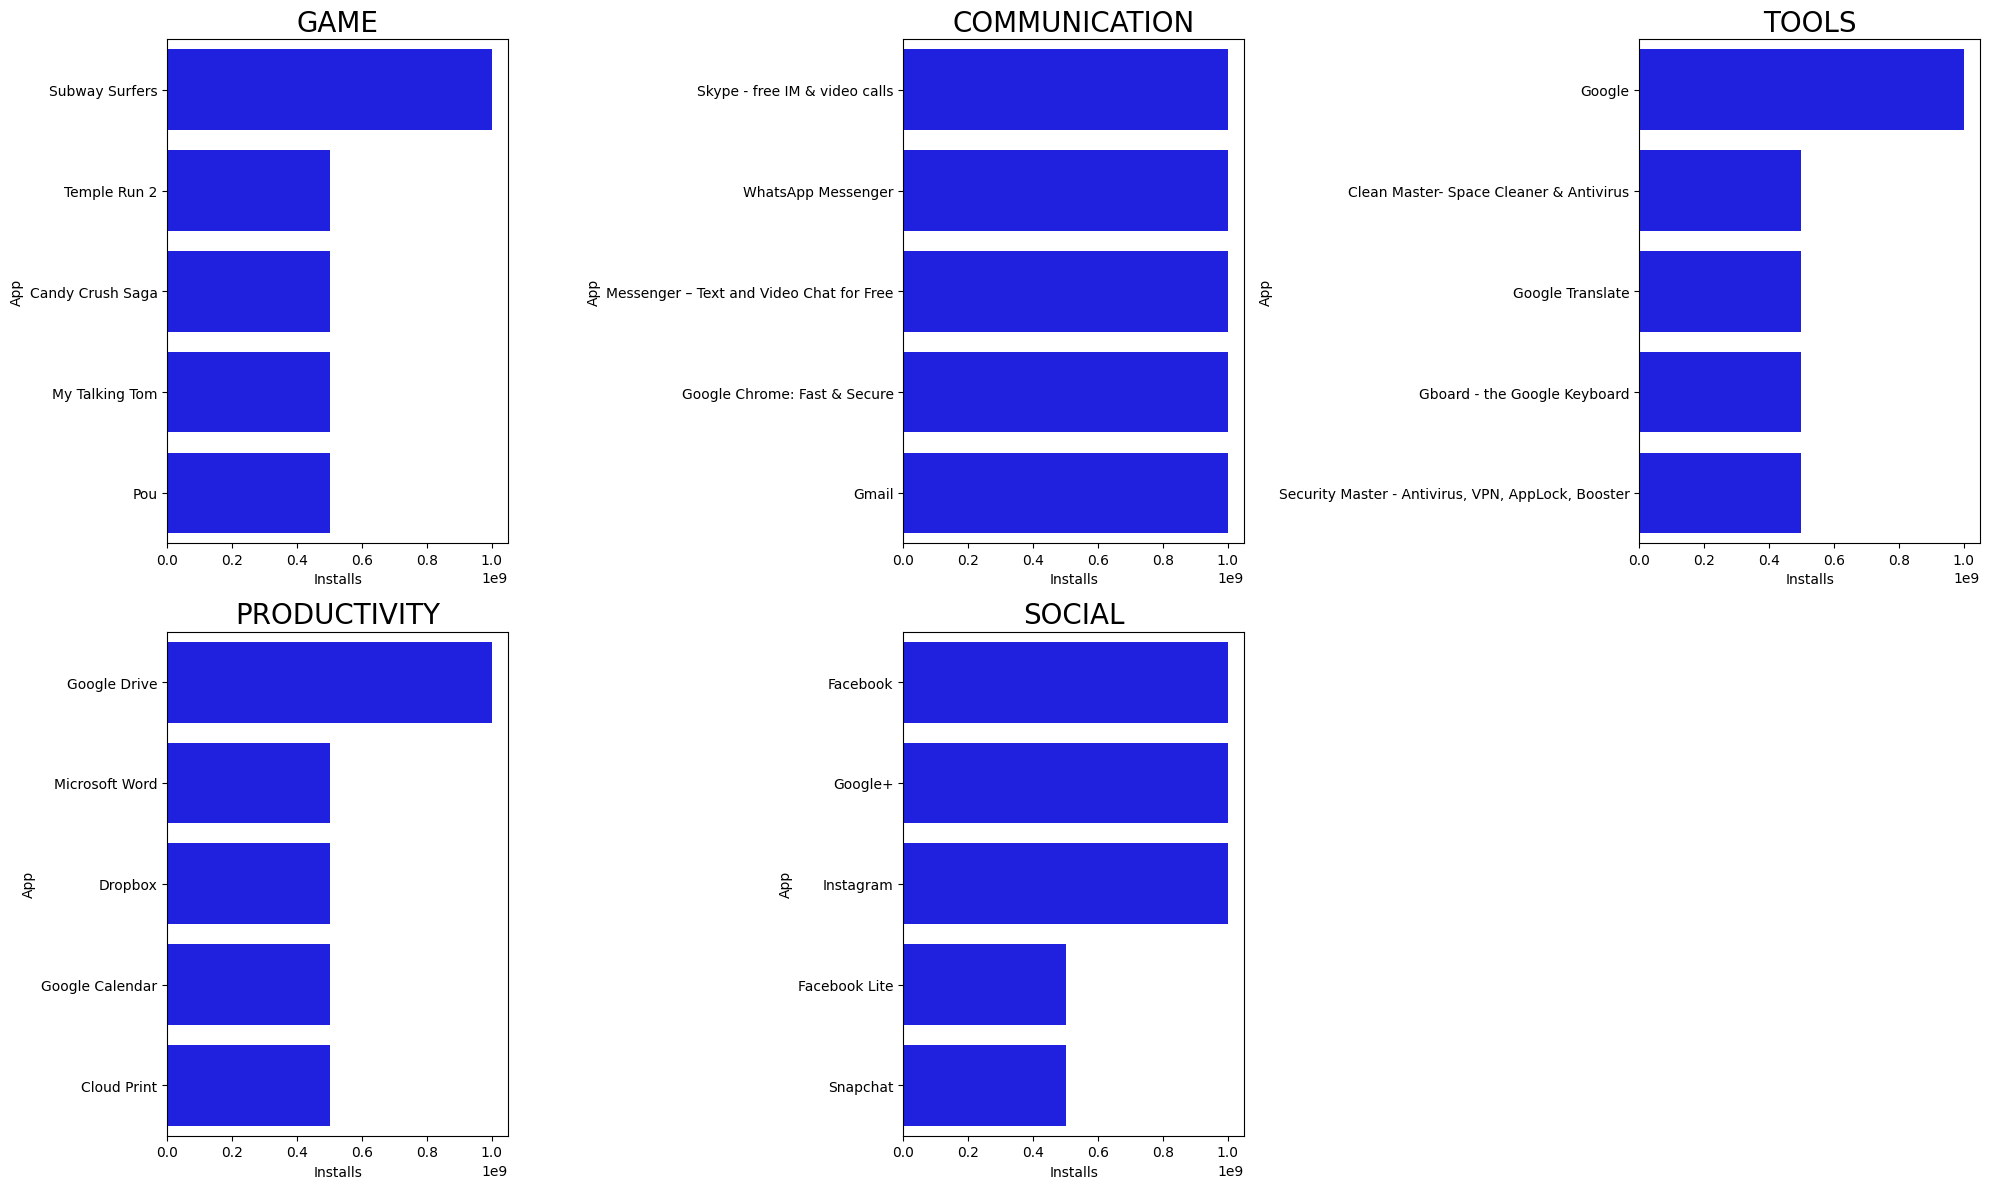

In [572]:
apps=["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]
plt.figure(figsize=(20,12))
for i,app in enumerate(apps):
  df3=df_apps_category[df_apps_category["Category"]==app]
  df3=df3.head(5)
  #print(df3) ==> DİREK YAZARSINIZ BU ŞEKİLDE
  plt.subplot(2,3,i+1)
  sns.barplot(data=df3,x="Installs",y="App",color="b")
  plt.title(app,size=20)
plt.tight_layout()
plt.show()

Yeni dosya oluşturma

In [573]:
df_clean.to_csv("googleplaystore_cleaned.csv",index=False) # düzenlediğimiz datasetini csv dosyasına dönüştürme

In [574]:
# top 5 rating

In [575]:
df_clean[["App","Rating"]][df_clean["Rating"]==5] # basit haliyle bu şekilde yapılabilir ya da groupby

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
...,...,...
10721,Mad Dash Fo' Cash,5.0
10742,GKPB FP Online Church,5.0
10776,Monster Ride Pro,5.0
10820,Fr. Daoud Lamei,5.0


In [576]:
rating_df=df_clean.groupby(["Category","Installs","App"])["Rating"].sum().reset_index()

In [577]:
top_rating=rating_df[rating_df["Rating"]==5.0]

In [578]:
top_rating.sort_values(by="Installs",ascending=False,inplace=True)

/tmp/ipython-input-2020422298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rating.sort_values(by="Installs",ascending=False,inplace=True)


In [579]:
top_rating.head(10)

,Category,Installs,App,Rating
2390,FAMILY,10000,Ek Bander Ne Kholi Dukan,5.0
8608,TOOLS,5000,CL Keyboard - Myanmar Keyboard (No Ads),5.0
5525,LIFESTYLE,5000,Oración CX,5.0
850,COMICS,5000,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
7639,SHOPPING,1000,Dine In CT - Food Delivery,5.0
8581,TOOLS,1000,ReactNative BG Geolocation,5.0
1263,DATING,1000,American Girls Mobile Numbers,5.0
1988,FAMILY,1000,Accounting Quiz (AQ) Malaysia,5.0
2134,FAMILY,1000,Master E.K,5.0
2157,FAMILY,1000,Quran Khmer Offline AY,5.0


In [580]:
df_clean["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2202
4.0.3 and up,1395
4.0 and up,1285
Varies with device,990
4.4 and up,818
2.3 and up,616
5.0 and up,512
4.2 and up,372
2.3.3 and up,273


In [581]:
df_clean["Android Ver"].replace("and up", "", regex=True, inplace=True)# regex => and up geçen bütün stringleri sil demek

/tmp/ipython-input-1902951274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Android Ver"].replace("and up", "", regex=True, inplace=True)# regex => and up geçen bütün stringleri sil demek


In [582]:
df_clean['Android Ver']

,Android Ver
0,4.0.3
1,4.0.3
2,4.0.3
3,4.2
4,4.4
...,...
10836,4.1
10837,4.1
10838,2.2
10839,Varies with device


In [587]:
df_clean["Android Ver"]=df_clean["Android Ver"].replace("Varies with device", "", regex=True).replace("W", "", regex=True).replace("",np.nan)

In [588]:
df_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [590]:
# "-" olanları da silelim az oldukları için
df_clean[df_clean['Android Ver'].str.contains("-")==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,4,7,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,19,6,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,9,5,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,4,12,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,11,4,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,7,12,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,8,9,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,13,7,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,10,4,2018


In [591]:
df_clean=df_clean[df_clean['Android Ver'].str.contains("-")==False]

In [592]:
df_clean.shape

(8658, 16)

In [593]:
df_clean['Android Ver'].value_counts()

,count
Android Ver,
4.1,2202
4.0.3,1395
4.0,1285
4.4,829
2.3,616
5.0,512
4.2,372
2.3.3,273
2.2,239


# Target Encoding (Mean)

Genres değerleri çok fazla ve benim işime yaramıyor o yüzden onları installs değerlerinin mean ini vereceğim

In [595]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017


In [600]:
mean_genres_installs=df_clean.groupby(["Genres"])["Installs"].mean()/1000000

In [601]:
mean_genres_installs.reset_index()

,Genres,Installs
0,Action,11.255844
1,Action;Action & Adventure,3.910955
2,Adventure,4.064319
3,Adventure;Action & Adventure,21.230000
4,Adventure;Brain Games,0.100000
...,...,...
112,Video Players & Editors,7.093219
113,Video Players & Editors;Creativity,5.000000
114,Video Players & Editors;Music & Video,5.000000
115,Weather,2.270176


In [605]:
df_clean["Genres Encoded"]=mean_genres_installs[df_clean["Genres"]].values


/tmp/ipython-input-3396189448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Genres Encoded"]=mean_genres_installs[df_clean["Genres"]].values


Diğer Yöntem:

mean_genres_installs=mean_genres_installs.to_dict() -> dictionary çevir


df_clean["Genres Encoded"]=df_clean["Genres"].map(mean_genres_installs)

In [603]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Genres Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018,1.830859
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018,0.500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018,1.830859
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018,1.830859
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018,0.285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017,0.360664
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016,1.034710
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017,0.360664
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018,0.360664
